In [5]:
import sys
sys.path.append("../src")
sys.path.append("../DASstore")
      
from datetime import datetime
from tdms_io import get_reader_array, get_data_from_array, get_dir_properties, load_xcorr
from visualisation import ts_spectrogram, psd_with_channel_slicing, animated_spectrogram, plot_gps_coords

In [ ]:
dir_path = "../../temp_data_store/FirstData/"
dir_path = "../../../../gpfs/data/DAS_data/Data/"
dir_path = "../../../../gpfs/scratch/gfs19eku/20240205/"
task_t0 = datetime(year = 2024, month = 2, day = 5, 
                   hour = 12, minute = 1, second = 0, microsecond = 0)

properties = get_dir_properties(dir_path)
prepro_para = {
    'cha1': 4000,
    'cha2': 4001,
    'sps': properties.get('SamplingFrequency[Hz]'),
    'spatial_ratio': int(1 / properties.get('SpatialResolution[m]')),          # int(target_spatial_res/spatial_res)
    'n_minute': 4320,
    'freqmax': 49.9,
    'freqmin': 1,
}

ts_spectrogram(dir_path, prepro_para, task_t0)

reader_array, timestamps = get_reader_array(dir_path)

In [ ]:
channel_slices = [[1500, 1500], [3000, 3000], [5000, 5000], [7000, 7000]]
psd_with_channel_slicing(reader_array, prepro_para, task_t0, timestamps, channel_slices)

In [ ]:
animated_spectrogram(reader_array, prepro_para, task_t0, timestamps)

In [ ]:
plot_gps_coords('results/linewalk_gps.csv')

### xCorr stuff

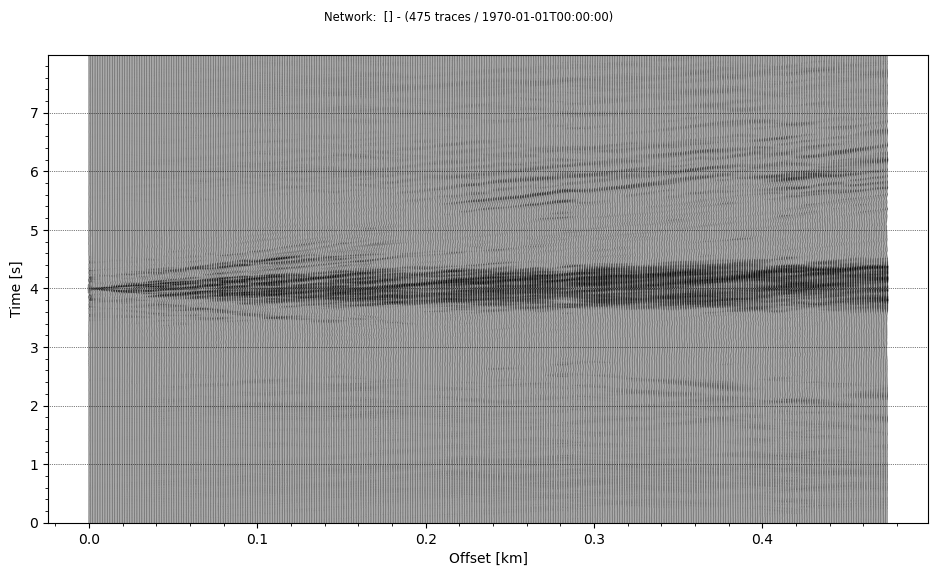

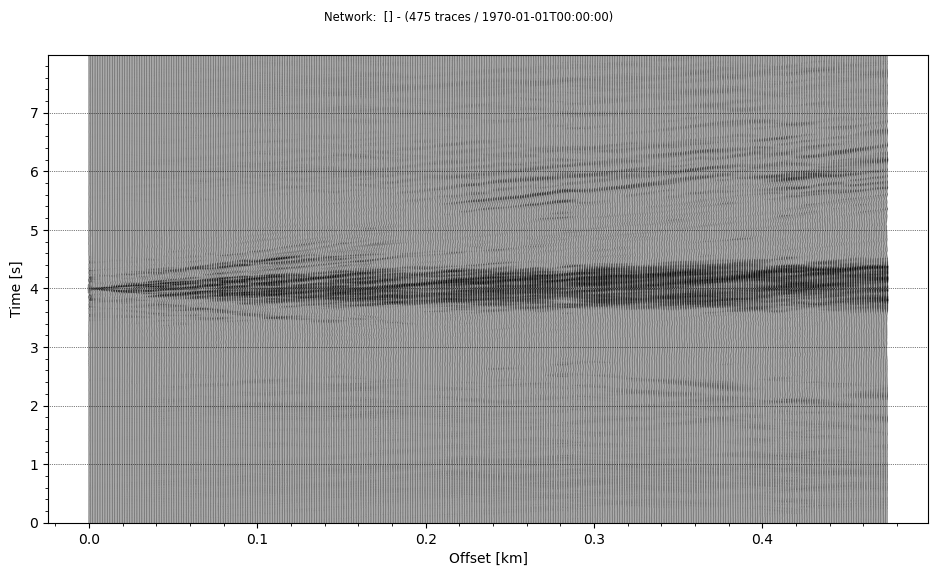

In [8]:
corr_path = '../results/saved_corrs/2024-02-05 12:01:00_4320mins_f0.01:49.9__3850:5750_1m.txt'
stream = load_xcorr(corr_path, as_stream=True)

dx = 1.0
for i in range(0, len(stream)):
    stream[i].stats.distance = i*dx
# stream.filter("bandpass", freqmin=5, freqmax=50)
stream.plot(type='section', fillcolors=('k', None))
# recordstart=6, recordlength=4